# **Classifier tester**

Test one or more classifier models against held-out dataset. <br>
Using held-out test features, evaluates the peformance of the estimated model.<br>
Can be part of a kubeflow pipeline as a test step that is run post EDA and
training/validation cycles.<br>
This function is part of the [sklearn-project demo](https://github.com/mlrun/demos/tree/master/scikit-learn-pipeline).<br>
To see how the model is trained or how the data-set is generated, check out `sklearn_classifier` function from the function marketplace repository

### **Steps**

1. [Setup function parameters](#Setup-function-parameters)
2. [Importing the function](#Importing-the-function)
3. [Running the function locally](#Running-the-function-locally)
4. [Running the function remotely](#Running-the-function-remotely)

In [1]:
import warnings
warnings.filterwarnings("ignore")

### **Setup function parameters**

In [2]:
data_path  = 'https://s3.wasabisys.com/iguazio/data/function-marketplace-data/sklearn_classifier/iris_dataset.csv'
MODEL_PATH = 'https://s3.wasabisys.com/iguazio/models/iris/model.pkl'
random_forst_classifier = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/RandomForestClassifier.pkl'
logistic_regression = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/LogisticRegression.pkl'
adaboost_classifier = 'https://s3.wasabisys.com/iguazio/models/function-marketplace-models/test_classifier/AdaBoostClassifier.pkl'

models = {"RandomForestClassifier": random_forst_classifier, 
           "LogisticRegression": logistic_regression,
           "AdaBoostClassifier": adaboost_classifier}

### **Importing the function**

In [3]:
import mlrun
import os
mlrun.set_environment(project='function-marketplace')

fn = mlrun.import_function('hub://test_classifier')

fn.apply(mlrun.auto_mount())
if os.getenv('MLRUN_CE','false')=='true':
    fn.spec.disable_auto_mount=False

> 2022-11-17 14:07:35,606 [warning] Failed syncing config from server: {'exc': "'bool' object has no attribute 'mode'", 'traceback': 'Traceback (most recent call last):\n  File "/opt/conda/lib/python3.8/site-packages/mlrun/db/httpdb.py", line 262, in connect\n    if config.ce.mode and config.ce.mode != server_cfg.get("ce_mode", ""):\nAttributeError: \'bool\' object has no attribute \'mode\'\n'}
> 2022-11-17 14:07:35,621 [info] loaded project function-marketplace from MLRun DB


### **Running the function locally**

> 2022-11-17 14:07:35,697 [info] starting run RandomForestClassifier uid=bff57a6a19db44898c9f0fbfc6c0d744 DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...c6c0d744,0,Nov 17 14:07:35,completed,RandomForestClassifier,kind=owner=jovyanhost=mlrun-jupyter-5fccd98548-vqhwq,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9733333333333334test-error=0.02666666666666667auc-micro=0.9967111111111111auc-weighted=0.9969666666666666f1-score=0.9732905982905983precision_score=0.9753086419753086recall_score=0.9733333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:07:37,991 [info] run executed, status=completed
> 2022-11-17 14:07:37,993 [info] starting run LogisticRegression uid=bbc3cb6e611c4a24adc84eadf354064c DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...f354064c,0,Nov 17 14:07:38,completed,LogisticRegression,kind=owner=jovyanhost=mlrun-jupyter-5fccd98548-vqhwq,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.8533333333333334test-error=0.14666666666666667auc-micro=0.9745111111111111auc-weighted=0.9896f1-score=0.8458736163654197precision_score=0.8981481481481483recall_score=0.8533333333333334,confusion-matrixprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:07:39,032 [info] run executed, status=completed
> 2022-11-17 14:07:39,034 [info] starting run AdaBoostClassifier uid=f200b4c707db41deaaaeefb1fbadb7e8 DB=http://mlrun-api:8080


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...fbadb7e8,0,Nov 17 14:07:39,completed,AdaBoostClassifier,kind=owner=jovyanhost=mlrun-jupyter-5fccd98548-vqhwq,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9533333333333334test-error=0.04666666666666667auc-micro=0.9892888888888888auc-weighted=0.9940666666666668f1-score=0.9533286661999534precision_score=0.9534480458850206recall_score=0.9533333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:07:40,530 [info] run executed, status=completed


<Figure size 432x288 with 0 Axes>

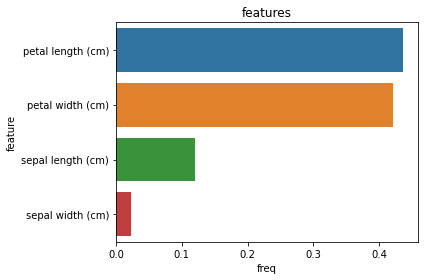

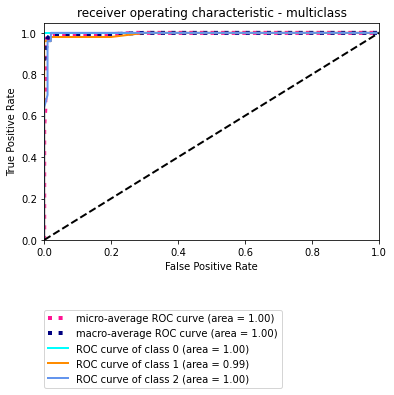

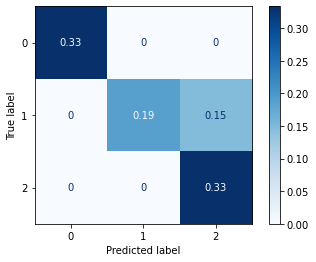

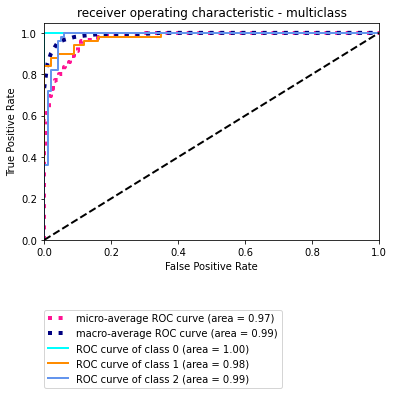

<Figure size 432x288 with 0 Axes>

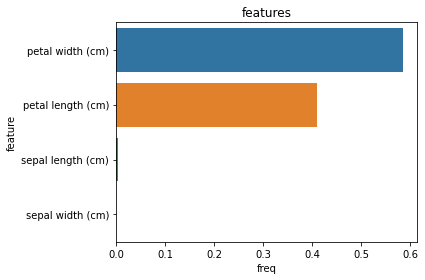

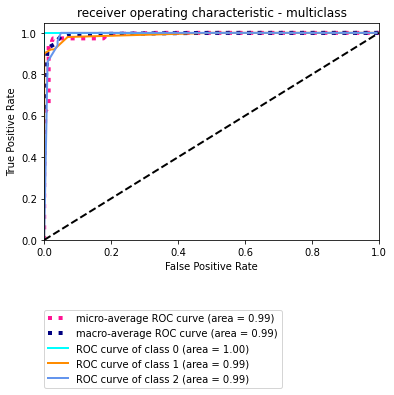

In [4]:
outputs = []
for key,value in models.items():
    output = fn.run(name=key,
                    params = {'label_column':'label',
                              'model_update': False},
                    inputs={'test_set': data_path,
                            'models_path': value},
                    local=True)
    outputs.append(output.outputs)

### **Running the function remotely**

In [5]:
outputs = []
for key,value in models.items():
    output = fn.run(name=key,
                    params = {'label_column':'label',
                              'model_update': False},
                    inputs={'test_set': data_path,
                            'models_path': value},
                    local=False)
    outputs.append(output.outputs)

> 2022-11-17 14:07:41,043 [info] starting run RandomForestClassifier uid=b54d53ecf7a547e7a3c5a5a11c96f99a DB=http://mlrun-api:8080
> 2022-11-17 14:07:41,256 [info] Job is running in the background, pod: randomforestclassifier-qt4td
> 2022-11-17 14:07:47,457 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...1c96f99a,0,Nov 17 14:07:44,completed,RandomForestClassifier,kind=jobowner=jovyanmlrun/client_version=1.1.1host=randomforestclassifier-qt4td,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9733333333333334test-error=0.02666666666666667auc-micro=0.9967111111111111auc-weighted=0.9969666666666666f1-score=0.9732905982905983precision_score=0.9753086419753086recall_score=0.9733333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:07:50,409 [info] run executed, status=completed
> 2022-11-17 14:07:50,410 [info] starting run LogisticRegression uid=f05e4e38f4db457f9493638fad157326 DB=http://mlrun-api:8080
> 2022-11-17 14:07:50,721 [info] Job is running in the background, pod: logisticregression-zsg6w
> 2022-11-17 14:07:56,633 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...ad157326,0,Nov 17 14:07:53,completed,LogisticRegression,kind=jobowner=jovyanmlrun/client_version=1.1.1host=logisticregression-zsg6w,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.8533333333333334test-error=0.14666666666666667auc-micro=0.9745111111111111auc-weighted=0.9896f1-score=0.8458736163654197precision_score=0.8981481481481483recall_score=0.8533333333333334,confusion-matrixprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:07:56,852 [info] run executed, status=completed
> 2022-11-17 14:07:56,853 [info] starting run AdaBoostClassifier uid=ed8dfe59a7864a58a8e84988f4176ac9 DB=http://mlrun-api:8080
> 2022-11-17 14:07:57,087 [info] Job is running in the background, pod: adaboostclassifier-gcdbp
> 2022-11-17 14:08:03,368 [info] run executed, status=completed
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
function-marketplace,...f4176ac9,0,Nov 17 14:08:00,completed,AdaBoostClassifier,kind=jobowner=jovyanmlrun/client_version=1.1.1host=adaboostclassifier-gcdbp,test_setmodels_path,label_column=labelmodel_update=False,accuracy=0.9533333333333334test-error=0.04666666666666667auc-micro=0.9892888888888888auc-weighted=0.9940666666666668f1-score=0.9533286661999534precision_score=0.9534480458850206recall_score=0.9533333333333333,confusion-matrixfeature-importancesprecision-recall-multiclassroc-multiclasstest_set_preds


> 2022-11-17 14:08:06,248 [info] run executed, status=completed


In [6]:
outputs

[{'accuracy': 0.9733333333333334,
  'test-error': 0.02666666666666667,
  'auc-micro': 0.9967111111111111,
  'auc-weighted': 0.9969666666666666,
  'f1-score': 0.9732905982905983,
  'precision_score': 0.9753086419753086,
  'recall_score': 0.9733333333333333,
  'confusion-matrix': 's3://marketplace-daniels-12538-0ad28260e042/plots/RandomForestClassifier/0/confusion-matrix.html',
  'feature-importances': 's3://marketplace-daniels-12538-0ad28260e042/plots/RandomForestClassifier/0/feature-importances.html',
  'precision-recall-multiclass': 's3://marketplace-daniels-12538-0ad28260e042/plots/RandomForestClassifier/0/precision-recall-multiclass.html',
  'roc-multiclass': 's3://marketplace-daniels-12538-0ad28260e042/plots/RandomForestClassifier/0/roc-multiclass.html',
  'test_set_preds': 'store://artifacts/function-marketplace/RandomForestClassifier_test_set_preds:b54d53ecf7a547e7a3c5a5a11c96f99a'},
 {'accuracy': 0.8533333333333334,
  'test-error': 0.14666666666666667,
  'auc-micro': 0.974511111

[Back to the top](#Classifier-tester)